<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [17]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [18]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [19]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [20]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [21]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [22]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


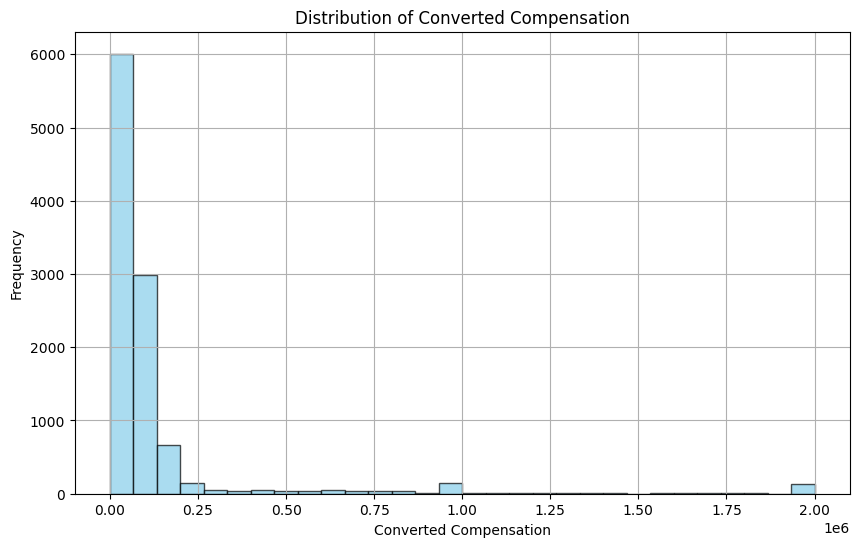

In [23]:
import matplotlib.pyplot as plt

# Remove any NaN values from the 'ConvertedComp' column
cleaned_data = df['ConvertedComp'].dropna()

# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


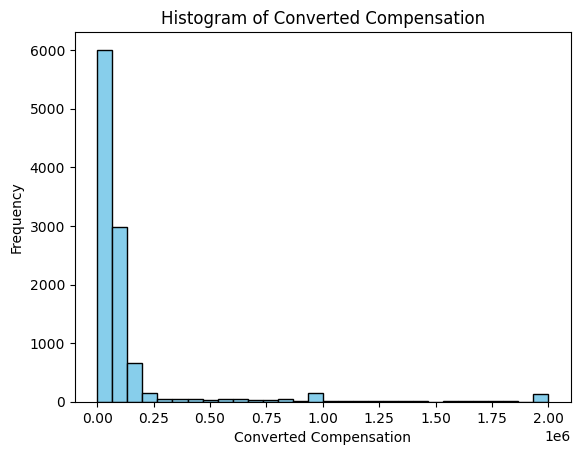

In [24]:
import matplotlib.pyplot as plt

# Plot histogram for ConvertedComp column
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show plot
plt.show()

What is the median of the column `ConvertedComp`?


In [25]:
# your code goes here
import pandas as pd

# Assuming df is your DataFrame containing the data
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [26]:
# your code goes here
# Filter the dataset to include only rows where Gender is "Man"
male_only = df[df['Gender'] == 'Man']

# Now, filter this dataset to exclude rows where Gender has any other value
male_only = male_only[male_only['Gender'].str.split(';').str.len() == 1]

# Now, count the number of rows in this filtered dataset
num_males = male_only.shape[0]

print("Number of responders identified themselves only as a Man:", num_males)

Number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [27]:
# your code goes here
# Filter the dataset to include only rows where Gender is "Man"
woman_only = df[df['Gender'] == 'Woman']

# Now, filter this dataset to exclude rows where Gender has any other value
woman_only = woman_only[woman_only['Gender'].str.split(';').str.len() == 1]

# Now, count the number of rows in this filtered dataset
num_females = woman_only.shape[0]

print("Number of responders identified themselves only as a Woman:", num_females)


Number of responders identified themselves only as a Woman: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
# your code goes here
# Get the five-number summary for the 'Age' column
five_num_summary = df['Age'].describe(percentiles=[0, 0.25, 0.5, 0.75, 1])
# Print the five-number summary
print("Five-number summary for the 'Age' column:")
print("Minimum:", five_num_summary['min'])
print("Q1 (25th percentile):", five_num_summary['25%'])
print("Median (50th percentile):", five_num_summary['50%'])
print("Q3 (75th percentile):", five_num_summary['75%'])
print("Maximum:", five_num_summary['max'])

Five-number summary for the 'Age' column:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


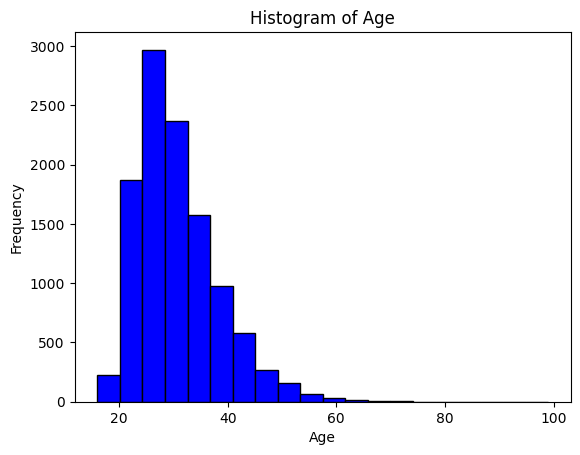

Five-number summary for the 'Age' column:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


In [29]:
# your code goes here
import matplotlib.pyplot as plt

# Plot histogram of 'Age' column
plt.hist(df['Age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Your provided code for getting the five-number summary
five_num_summary = df['Age'].describe(percentiles=[0, 0.25, 0.5, 0.75, 1])
print("Five-number summary for the 'Age' column:")
print("Minimum:", five_num_summary['min'])
print("Q1 (25th percentile):", five_num_summary['25%'])
print("Median (50th percentile):", five_num_summary['50%'])
print("Q3 (75th percentile):", five_num_summary['75%'])
print("Maximum:", five_num_summary['max'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


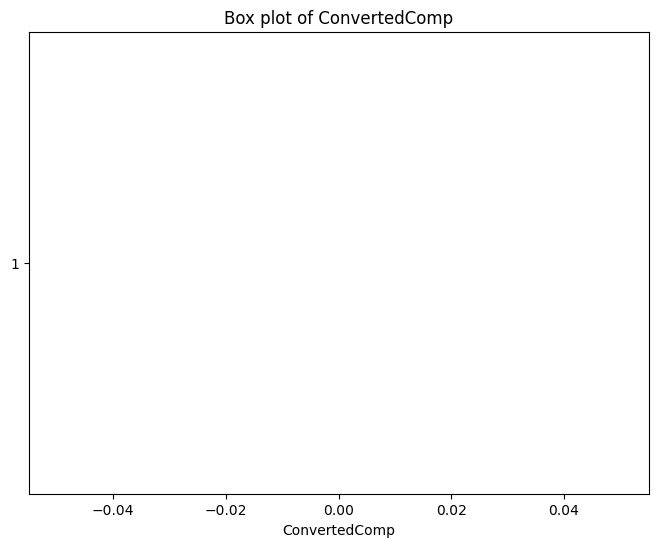

In [32]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Create a box plot of the 'ConvertedComp' column
plt.figure(figsize=(8,6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
# your code goes here
import pandas as pd

# Assuming df is your DataFrame containing the data
# Calculate the IQR for the 'ConvertedComp' column
converted_comp = df['ConvertedComp']
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
# Calculate lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for outliers detection:", lower_bound)
print("Upper Bound for outliers detection:", upper_bound)

Lower Bound for outliers detection: -82830.0
Upper Bound for outliers detection: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
# Identify outliers in the ConvertedComp column
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# your code goes here
# Filter out rows with outliers in the ConvertedComp column
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
print(filtered_df)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
# your code goes here
# Assuming df is your DataFrame containing the data
# Find the correlation between 'Age' and all other numerical columns
correlation = df.corrwith(df['Age'])

print("Correlation between 'Age' and other numerical columns:")
print(correlation)

<ipython-input-37-061b10922069>:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corrwith(df['Age'])


Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
